In [4]:
import pandas as pd

#### Preparing data by dropping the rows that have any missing values from the data frame

In [15]:
df = pd.read_csv('poverty_new.csv', sep='\t')

In [19]:
df_clean = df.dropna()

In [21]:
df_clean

,Index,Inhabitants,%incomes<5k,%jobless,Murders_M
0,1,587000,15.5,6.2,11.2
1,2,643000,19.5,6.4,13.4
3,4,692000,17.5,5.3,5.3
4,5,1248000,18.2,7.3,24.8
5,6,643000,15.5,5.9,12.7
6,7,1964000,20.2,6.4,20.9
7,8,1531000,21.3,7.6,35.7
8,9,713000,17.2,4.9,8.7
9,10,749000,14.3,6.4,9.6
10,11,7895000,18.1,6.0,14.5


#### Plot Murders_M against %jobless in the resulted dataframe

In [27]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


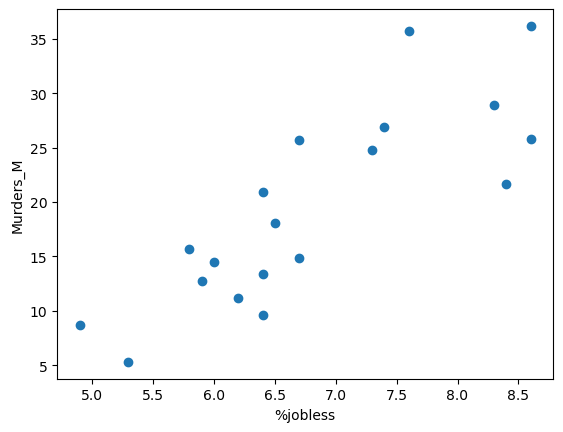

In [29]:
plt.figure()
ax = plt.axes()
ax.set_xlabel('%jobless')
ax.set_ylabel('Murders_M')
ax.scatter(df_clean['%jobless'], df_clean['Murders_M'])
plt.show()

#### Run a OLS linear regression of Murders_M (the Y) on %jobless (the X) and find out the coefficient for %jobless and the R‐squared  (R2) value. Add both values to your codes with a comment

In [32]:
import statsmodels.api as sm

In [34]:
#Data were load before
X = df_clean[['%jobless']].to_numpy()
Y = df_clean[['Murders_M']].to_numpy()
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     36.70
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           1.28e-05
Time:                        17:48:41   Log-Likelihood:                -57.073
No. Observations:                  19   AIC:                             118.1
Df Residuals:                      17   BIC:                             120.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.0706      7.616     -3.423      0.0

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


In [36]:
# The coefficient is 6.6928 and the R-square is 0.683

#### Add the line with the estimated Murders rate using your linear regression model in Requirement 3 to the figure you drew in Step 2

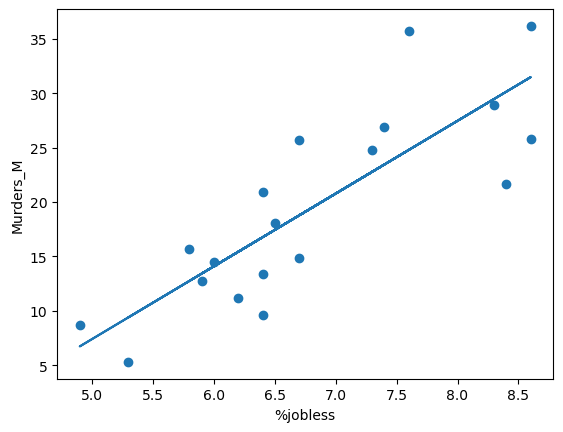

In [41]:
y_est = results.predict(X)

#Plot the estimated line aloing with scattered raw data on figure 
ax = plt.axes()
ax.set_xlabel('%jobless')
ax.set_ylabel('Murders_M')
ax.scatter(df_clean['%jobless'], df_clean['Murders_M'])
# Plot the regression line using estimated values (from model.predict)
ax.plot(df_clean['%jobless'], y_est)
plt.show()